## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

## 机器学习-房价预测

In [11]:
%matplotlib inline
from sklearn.datasets import load_boston
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']
print(X.shape)
print(y.shape)
print(dataset['feature_names'])

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


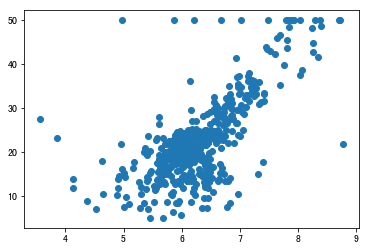

In [12]:
# 取房间数做例子（数据集第5列）
plt.scatter(X[:, 5], y)

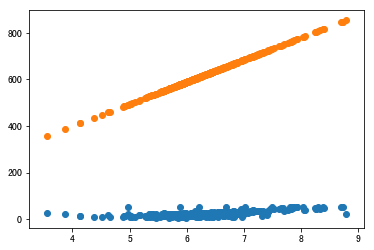

In [20]:
room_num = X[:, 5]
price = y

def get_price(rm, k, b):
    return k*rm + b

k = random.randint(-100, 100)
b = random.randint(-100, 100)

price_by_random_k_and_b = [get_price(rm, k, b) for rm in room_num]

plt.scatter(room_num, price)
plt.scatter(room_num, price_by_random_k_and_b)

In [16]:
def loss(y, y_hat):
    n = len(y)
    return 1/n * sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))


In [17]:
loss([1, 2, 3], [1, 3, 5])

1.6666666666666665

### 第一种方式，随机生成k和b，并计算对应的loss；随机生成1000次，记录loss最小时对应的k和b

k:-82, b:65, loss:227741.48059135987
k:52, b:95, loss:160365.35361558895
k:-39, b:-44, loss:98299.07297724715
k:-39, b:38, loss:53915.17119859092
k:-32, b:43, loss:33507.16108958103
k:-7, b:99, loss:1225.955119571146
k:8, b:-61, loss:1150.1426604901171
k:-11, b:72, loss:629.360543650198
k:17, b:-98, loss:261.859476250988
k:13, b:-62, loss:59.1097354604743
k:4, b:-2, loss:56.79306551778656


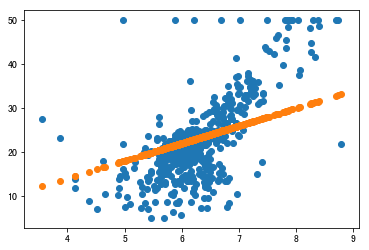

In [25]:
min_loss = float('inf')
best_k, best_b = None, None
for i in range(1000):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [get_price(rm, k, b) for rm in room_num]
    current_loss = loss(price, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("k:{}, b:{}, loss:{}".format(best_k, best_b, min_loss))

price_by_random_k_and_b = [get_price(rm, best_k, best_b) for rm in room_num]
plt.scatter(room_num, price)
plt.scatter(room_num, price_by_random_k_and_b)

### 第二种方式，让k和b按照loss变小的方向变化

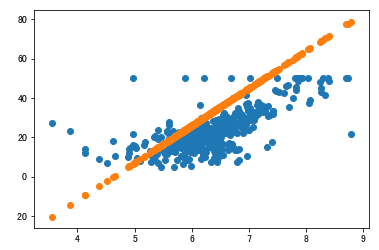

In [35]:
min_loss = float('inf')
price_by_direction_k_and_b = []

best_k = random.randint(-100, 100)
best_b = random.randint(-100, 100)

direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

next_direction = random.choice(direction)

for i in range(10000):

    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction, best_b + b_direction
    
    price_by_direction_k_and_b = [get_price(rm, current_k, current_b) for rm in room_num]
    current_loss = loss(price, price_by_direction_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        # print("k:{}, b:{}, loss:{}".format(best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
        
plt.scatter(room_num, price)
plt.scatter(room_num, price_by_direction_k_and_b)
        

### 第三种方式，使用梯度下降

##### 得到更快的更新，在更短的时间内获得更好的结果
##### 如何找对改变的方向  监督让他变化->监督学习

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - (kx_i + b))}x_i      =>      \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})}x_i $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - (kx_i + b))}  =>  \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})} $$

In [38]:
def partial_k(x, y, y_hat):
    n = len(y)
    return -2/n * sum((y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)))

def partial_b(y, y_hat):
    n = len(y)
    return -2/n * sum((y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))

k:-29.558577868416442, b:-98.65784825162939, loss:96576.83432952878, partialK:-3928.4997855499864, partialB:-618.9726504762997
k:17.199041015964525, b:-91.23772704655151, loss:108.5941907514249, partialK:-63.951334599235764, partialB:-11.444368569537518
k:17.95220964886993, b:-91.04982226707739, loss:82.76777419072945, partialK:-0.8348281268282567, partialB:-1.5204624162973617
k:17.954034854134576, b:-90.98011600092667, loss:82.66685356894563, partialK:0.19575431490366768, partialB:-1.356780285258881
k:17.943601521241156, b:-90.91242025618543, loss:82.5730208732487, partialK:0.2123344314252266, partialB:-1.3525064663718882
k:17.93298055181124, b:-90.84483732568577, loss:82.47941537433674, partialK:0.21235391416018617, partialB:-1.3508380666168014
k:17.9223690756799, b:-90.77733611950156, loss:82.38603470101503, partialK:0.2121032265196826, partialB:-1.3492141401502813
k:17.911770297330225, b:-90.70991603387503, loss:82.29287831280195, partialK:0.21184842800924347, partialB:-1.347592858

k:17.30847004516373, b:-86.87225193447841, loss:77.17490550222786, partialK:0.19734069661393627, partialB:-1.2553074592761126
k:17.29860895169056, b:-86.80952435519107, loss:77.09426539428276, partialK:0.19710356409717542, partialB:-1.2537990313508227
k:17.28875970770386, b:-86.74687215188557, loss:77.01381897069152, partialK:0.19686671652784693, partialB:-1.252292416013271
k:17.278922298964847, b:-86.6842952339872, loss:76.93356576625608, partialK:0.19663015356498673, partialB:-1.2507876110851623
k:17.26909671125178, b:-86.62179351102986, loss:76.85350531689556, partialK:0.19639387486548185, partialB:-1.2492846143911933
k:17.259282930360037, b:-86.55936689265641, loss:76.7736371596439, partialK:0.19615788008670154, partialB:-1.2477834237587049
k:17.249480942102053, b:-86.497015288618, loss:76.69396083264654, partialK:0.19592216888801542, partialB:-1.2462840370173558
k:17.239690732307377, b:-86.43473860877451, loss:76.61447587515893, partialK:0.1956867409313998, partialB:-1.24478645199

k:16.682415606010267, b:-82.88984576653934, loss:72.24760572190576, partialK:0.18228578760183395, partialB:-1.1595414064233167
k:16.67330680472794, b:-82.8319036066557, loss:72.17880018237392, partialK:0.18206674566930545, partialB:-1.1581480548383356
k:16.664208948947564, b:-82.7740310724017, loss:72.11015990249777, partialK:0.18184796694559568, partialB:-1.1567563775607828
k:16.655122025516548, b:-82.71622808011209, loss:72.04168448535049, partialK:0.18162945111537782, partialB:-1.1553663725785894
k:16.64604602129819, b:-82.65849454622268, loss:71.97337353495902, partialK:0.18141119786370724, partialB:-1.153978037882097
k:16.636980923171457, b:-82.60083038726921, loss:71.90522665630071, partialK:0.18119320687273924, partialB:-1.152591371464595
k:16.627926718031176, b:-82.5432355198881, loss:71.83724345530227, partialK:0.1809754778280991, partialB:-1.1512063713212874
k:16.618883392787943, b:-82.48570986081589, loss:71.76942353883692, partialK:0.18075801041701184, partialB:-1.149823035

k:16.10412218513599, b:-79.21125307213654, loss:68.04342583600075, partialK:0.1683794013700696, partialB:-1.0710812425071394
k:16.09570828448424, b:-79.15773125716899, loss:67.98471804913252, partialK:0.16817706991083595, partialB:-1.069794188212494


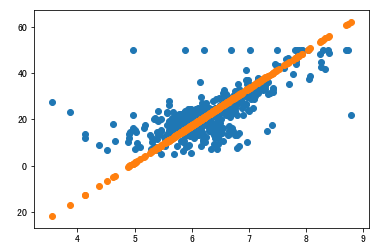

In [55]:

price_by_partial_k_and_b = []

current_k = random.random() * 200 -100
current_b = random.random() * 200 -100

learn_rate = 0.0001
losses = []
for i in range(100000):
    
    price_by_partial_k_and_b = [get_price(rm, current_k, current_b) for rm in room_num]
    
    current_loss = loss(price, price_by_partial_k_and_b)
    
    K_gradient = partial_k(room_num, price, price_by_partial_k_and_b)
    B_gradient = partial_b(price, price_by_partial_k_and_b)
    current_k = current_k - (K_gradient * learn_rate)
    current_b = current_b - (B_gradient * learn_rate)
    losses.append(current_loss)
    
    if i % 500 == 0:
        print("k:{}, b:{}, loss:{}, partialK:{}, partialB:{}".format(current_k, current_b, current_loss, K_gradient, B_gradient))
        
plt.scatter(room_num, price)
plt.scatter(room_num, price_by_partial_k_and_b)



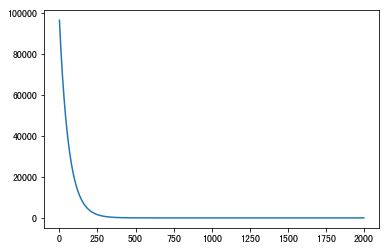

In [68]:
plt.plot(losses[:2000])

## 动态规划

In [109]:
from collections import defaultdict
from functools import wraps

In [158]:
# 不同长度对应的价值
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [83]:
price[20]

0

In [191]:
@memo
@get_call_time
def revenue(n):
    max_price = max([price[n]] + [revenue(i) + revenue(n-i) for i in range(1, n)])
    
    return max_price

In [193]:
revenue(10)

30

In [194]:
call_time

defaultdict(int,
            {('revenue', 1): 1,
             ('revenue', 2): 1,
             ('revenue', 3): 1,
             ('revenue', 4): 1,
             ('revenue', 5): 1,
             ('revenue', 6): 1,
             ('revenue', 7): 1,
             ('revenue', 8): 1,
             ('revenue', 9): 1,
             ('revenue', 10): 1})

In [192]:
# 计算每个r(n)的调用次数
call_time = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def _wrap(n):
        result = f(n)
        call_time[(f.__name__, n)] += 1
        return result
    
    return _wrap
        

In [162]:
# 用于存储已经计算过的r(n)
def memo(func):
    memo.cache = defaultdict(int)
    @wraps(func)
    def _wrap(n):
        result = None
        if n in memo.cache:
            result = memo.cache[n]
        else:
            result = func(n)
            memo.cache[n] = result
        return result
    return _wrap

In [163]:
solution = {}
max_price = defaultdict(int)

@memo
def r_with_s(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r_with_s(i) + r_with_s(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    
    solution[n] = (split_point, n - split_point)
    return max_price
    

In [182]:
r_with_s(38)

112

In [183]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36)}

In [185]:
# 解析solution
def get_solution(n):
    left, right = solution[n]
    if left == 0: return [right]
    return get_solution(left) + get_solution(right)

In [186]:
get_solution(38)

[2, 6, 10, 10, 10]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [238]:
from functools import lru_cache


In [270]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    count[0] += 1
    print('{}, executed: {}, {}'.format(count[0], string1, string2))
    
#     if string1 == string2: return 0
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
#     print(candidates)
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance


In [271]:
solution = {}
count = defaultdict(int)
edit_distance('ABCD', 'ADCDEF')

1, executed: ABCD, ADCDEF
2, executed: ABC, ADCDEF
3, executed: AB, ADCDEF
4, executed: A, ADCDEF
5, executed: , ADCDEF
6, executed: A, ADCDE
7, executed: , ADCDE
8, executed: A, ADCD
9, executed: , ADCD
10, executed: A, ADC
11, executed: , ADC
12, executed: A, AD
13, executed: , AD
14, executed: A, A
15, executed: , A
16, executed: A, 
17, executed: , 
18, executed: AB, ADCDE
19, executed: AB, ADCD
20, executed: AB, ADC
21, executed: AB, AD
22, executed: AB, A
23, executed: AB, 
24, executed: ABC, ADCDE
25, executed: ABC, ADCD
26, executed: ABC, ADC
27, executed: ABC, AD
28, executed: ABC, A
29, executed: ABC, 
30, executed: ABCD, ADCDE
31, executed: ABCD, ADCD
32, executed: ABCD, ADC
33, executed: ABCD, AD
34, executed: ABCD, A
35, executed: ABCD, 


3

In [272]:
solution

{('A', 'A'): '',
 ('A', 'AD'): 'ADD D',
 ('A', 'ADC'): 'ADD C',
 ('A', 'ADCD'): 'ADD D',
 ('A', 'ADCDE'): 'ADD E',
 ('A', 'ADCDEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AD'): 'SUB B => D',
 ('AB', 'ADC'): 'ADD C',
 ('AB', 'ADCD'): 'ADD D',
 ('AB', 'ADCDE'): 'ADD E',
 ('AB', 'ADCDEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AD'): 'DEL C',
 ('ABC', 'ADC'): '',
 ('ABC', 'ADCD'): 'ADD D',
 ('ABC', 'ADCDE'): 'ADD E',
 ('ABC', 'ADCDEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AD'): '',
 ('ABCD', 'ADC'): 'DEL D',
 ('ABCD', 'ADCD'): '',
 ('ABCD', 'ADCDE'): 'ADD E',
 ('ABCD', 'ADCDEF'): 'ADD F'}

In [285]:
# 解析solution
def parse_solution(text_tuple):
    left, right = text_tuple[0], text_tuple[1]
    if left == right: 
        return
    if len(left) == 1 or len(right) == 1:
        return
    operation = solution[text_tuple]
    if operation.find('ADD') > -1:
        parse_solution((left, right[:-1]))
    elif operation.find('DEL') > -1:
        parse_solution((left[:-1], right))
    else:
        parse_solution((left[:-1], right[:-1]))
    print(solution[text_tuple], end=' ')

parse_solution(('ABCD', 'ADCDEF'))

SUB B => D   ADD E ADD F 

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:为了找到损失函数下降最快的方向，让模型在更短的时间内获得更好的效果

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是高维导数的另一种说法，代表损失函数的上升最快的方向；下降指的是向导数的反方向进行位移


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:模型每次更新都向着更新最快的方向进行，训练效率大大提升

4. Using the simple words to describe: What's the machine leanring.¶

Ans:我的理解，机器学习就是在大量的数据中找出规律或特征，从而达到对新数据的预测或判断

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

动态规划能更快速的解决一些复杂的问题；它能存储计算中的中间过程，让求解更加快速。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

问题的形式和种类往往都是不同的，求解动态规划中的子问题的方式也不一样，目前无法使用机器学习的方式来达到适配所有问题的目的。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

背包问题、割绳子问题、金矿模型

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

文档单词智能纠错、输入法纠错、新闻推荐

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

1、动态规划问题一般都要能找出具有重复性的子问题
2、并且对子问题进行存储，到达减少重复计算的目的
3、最后要对Solution 进行解析

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

不同问题的阶段划分、状态识别等内容常需要不同的方法，无统一方法

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

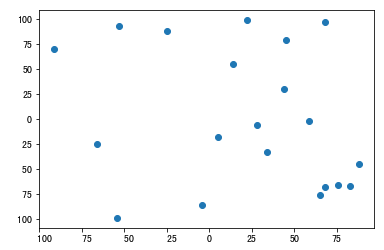

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

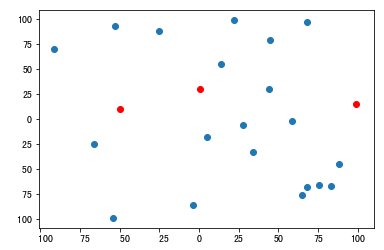

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro